Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

Content: This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso,LassoCV,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

In [2]:
csv_file_path = '/Users/ashwanisindhu/Downloads/avocado.csv'
avocado_df= pd.read_csv(csv_file_path)

In [3]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
avocado_df.shape

(18249, 14)

In [6]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [9]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
avocado_df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
avocado_df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
avocado_df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [14]:
avocado_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

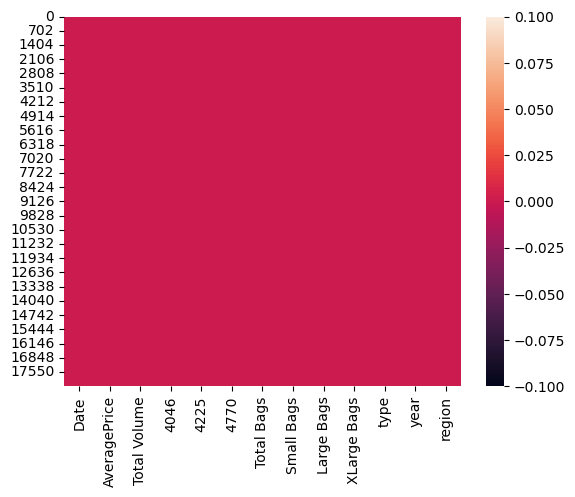

In [15]:
sns.heatmap(avocado_df.isnull())
                      

In [16]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [17]:
avocado_df.drop(['Date'],axis=1,inplace=True)

In [18]:
label_encoders = {}
for column in avocado_df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        avocado_df[column] = label_encoders[column].fit_transform(avocado_df[column])


In [19]:
avocado_df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

0    9126
1    9123
Name: type, dtype: int64

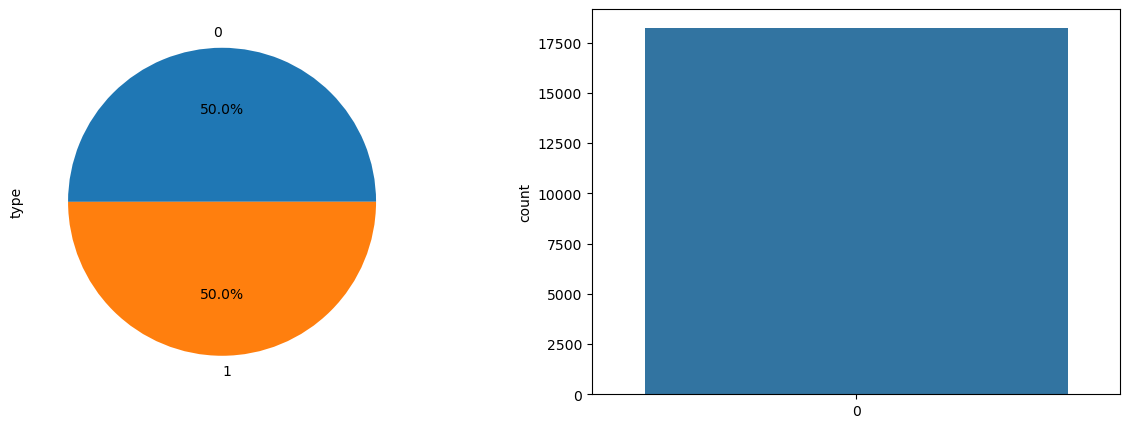

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
avocado_df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(avocado_df['type'])
avocado_df['type'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

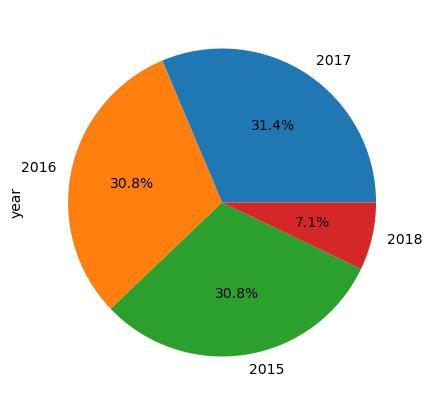

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
avocado_df['year'].value_counts().plot.pie(autopct='%1.1f%%')
avocado_df['year'].value_counts()

<Axes: xlabel='year', ylabel='region'>

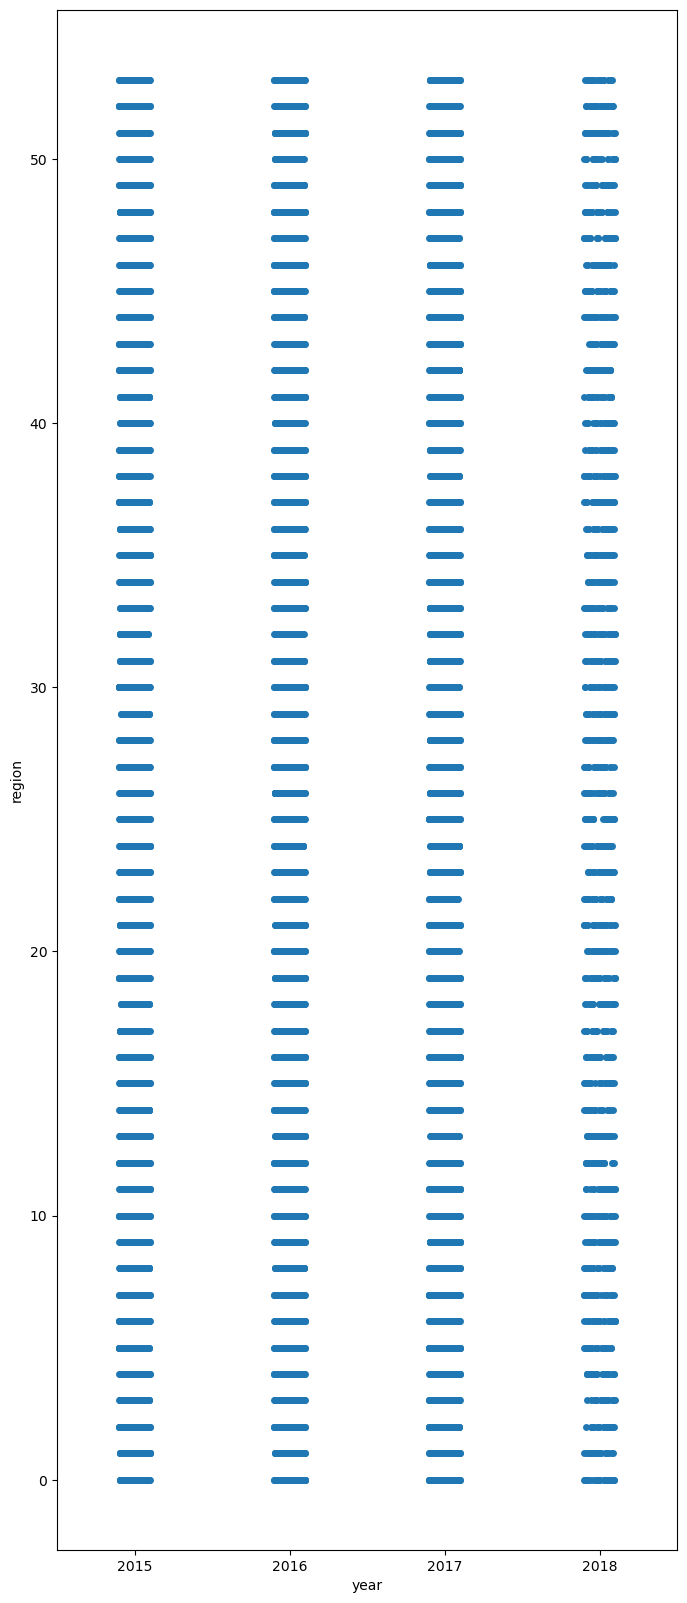

In [22]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=avocado_df)

<Axes: xlabel='year', ylabel='AveragePrice'>

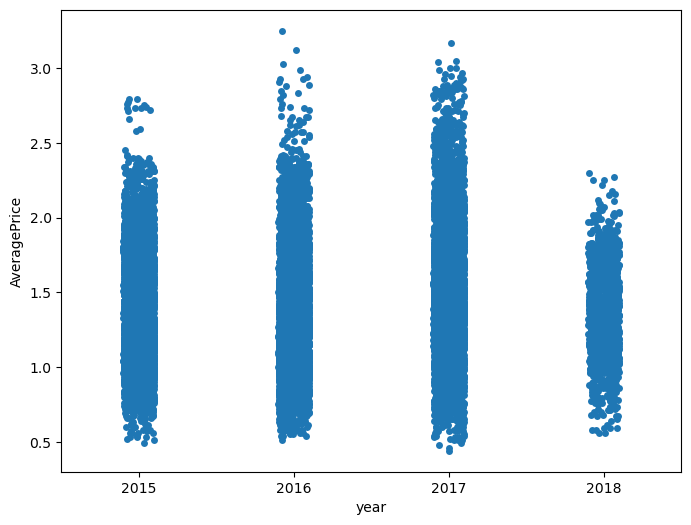

In [23]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=avocado_df)

<Axes: xlabel='type', ylabel='AveragePrice'>

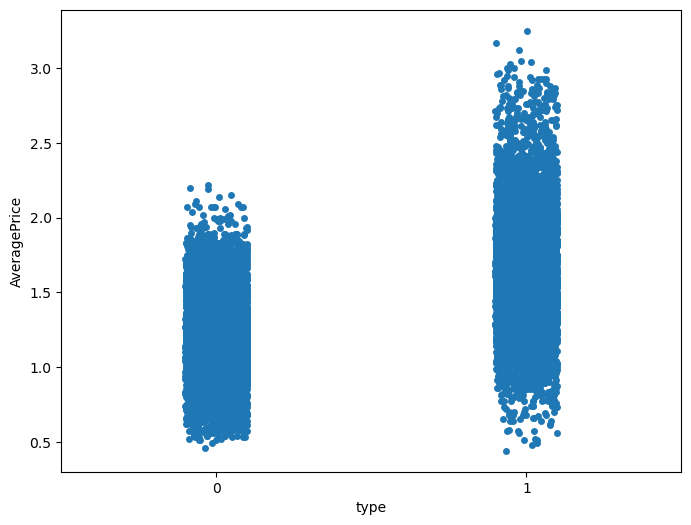

In [24]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=avocado_df)

Text(0.5, 1.0, 'AveragePrice VS type')

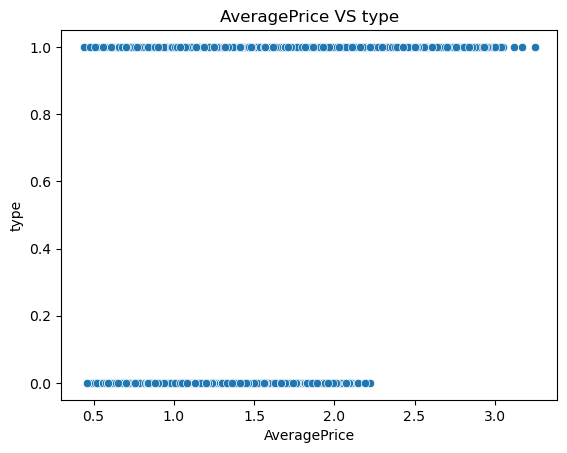

In [25]:
sns.scatterplot(x='AveragePrice',y='type',data=avocado_df,palette='bright')
plt.title('AveragePrice VS type')

<Axes: xlabel='AveragePrice', ylabel='type'>

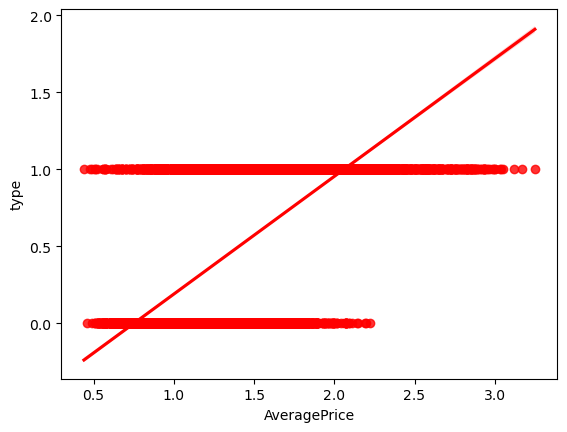

In [26]:
sns.regplot(data=avocado_df, x="AveragePrice", y="type", color='r')

<Axes: xlabel='AveragePrice', ylabel='year'>

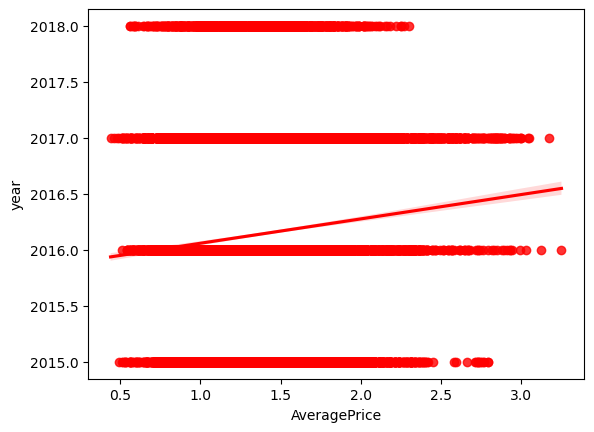

In [27]:
sns.regplot(data=avocado_df, x="AveragePrice", y="year", color='r')

<Axes: xlabel='Total Volume', ylabel='Count'>

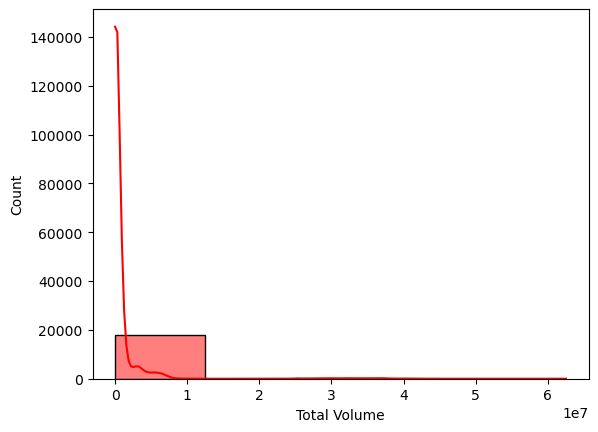

In [28]:
sns.histplot(data=avocado_df,x='Total Volume',bins=5,kde=True,color='r')

<Axes: xlabel='AveragePrice', ylabel='Count'>

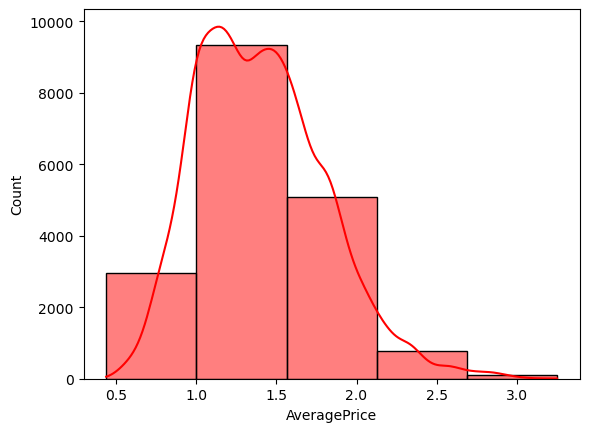

In [29]:
sns.histplot(data=avocado_df,x='AveragePrice',bins=5,kde=True,color='r')

<Axes: xlabel='type', ylabel='Count'>

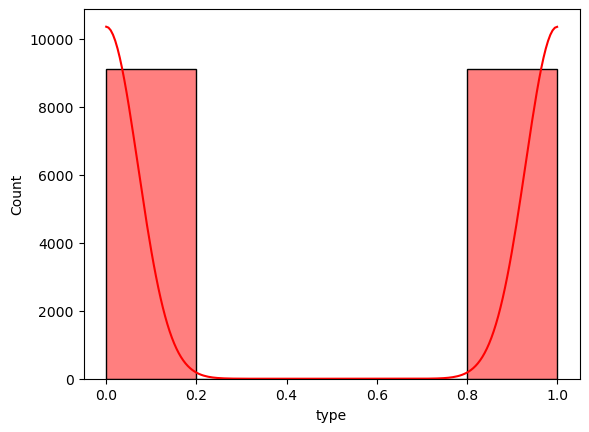

In [30]:
sns.histplot(data=avocado_df,x='type',bins=5,kde=True,color='r')

<Axes: xlabel='year', ylabel='Count'>

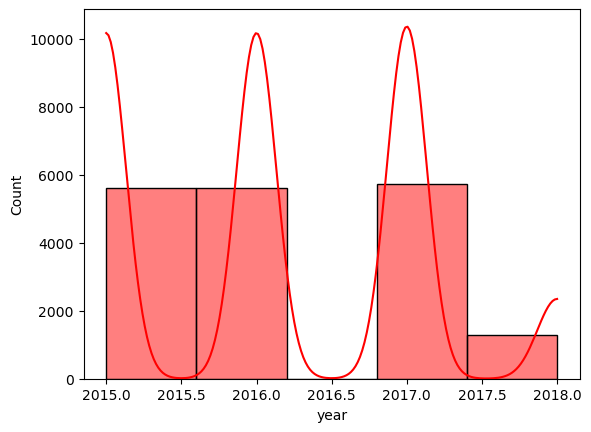

In [31]:
sns.histplot(data=avocado_df,x='year',bins=5,kde=True,color='r')

AveragePrice        Axes(0.125,0.77;0.227941x0.11)
Total Volume     Axes(0.398529,0.77;0.227941x0.11)
4046             Axes(0.672059,0.77;0.227941x0.11)
4225               Axes(0.125,0.638;0.227941x0.11)
4770            Axes(0.398529,0.638;0.227941x0.11)
Total Bags      Axes(0.672059,0.638;0.227941x0.11)
Small Bags         Axes(0.125,0.506;0.227941x0.11)
Large Bags      Axes(0.398529,0.506;0.227941x0.11)
XLarge Bags     Axes(0.672059,0.506;0.227941x0.11)
type               Axes(0.125,0.374;0.227941x0.11)
year            Axes(0.398529,0.374;0.227941x0.11)
region          Axes(0.672059,0.374;0.227941x0.11)
dtype: object

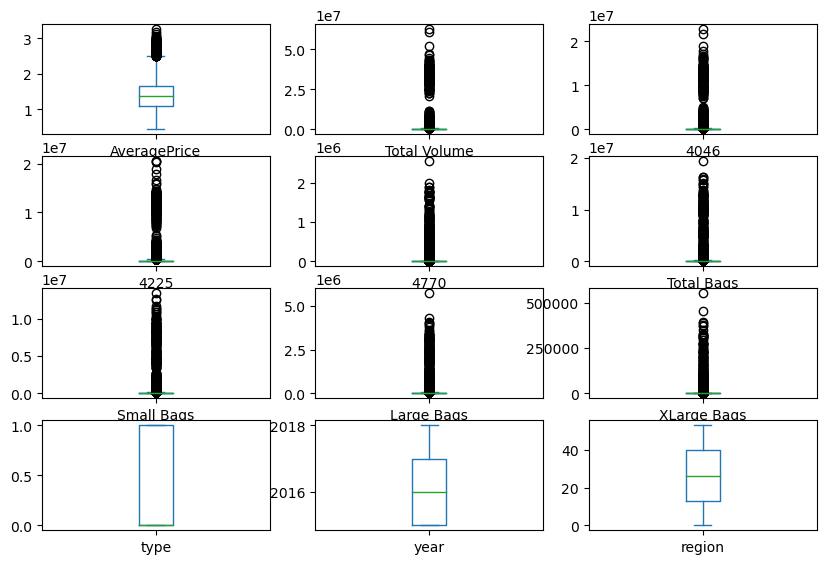

In [32]:
avocado_df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10))

In [33]:
from scipy.stats import zscore
out_liers=avocado_df[['Total Volume','4225','4770','4046','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_liers))
z

,Total Volume,4225,4770,4046,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.199902,0.212091,0.230816,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.208054,0.211997,0.231103,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.154478,0.211325,0.231007,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.185350,0.211864,0.230741,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.208719,0.211834,0.230891,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.243857,0.212540,0.230017,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.242277,0.212540,0.230693,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.243090,0.205766,0.230693,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.242651,0.205774,0.230428,0.231866,0.229543,0.222529,0.17558


In [34]:
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113]),
 array([3, 3, 7, ..., 6, 6, 6]))

In [35]:
data=avocado_df[(z<3).all(axis=1)]
data.shape

(17782, 12)

In [36]:
print("dataloss",((avocado_df.shape[0]-data.shape[0])/avocado_df.shape[0])*100)   ##data loss is more not making any changes in the dataset

dataloss 2.55904433119623


In [37]:
data.skew().sort_values(ascending=False)

XLarge Bags     6.159391
4770            5.137120
Large Bags      5.072468
4046            4.928850
4225            4.472729
Small Bags      4.238647
Total Bags      4.082103
Total Volume    3.782060
AveragePrice    0.560969
year            0.220792
region          0.005773
type           -0.052210
dtype: float64

In [38]:
data[['XLarge Bags','Total Volume','AveragePrice','Total Bags','4046']]=np.cbrt(data[['XLarge Bags','Total Volume','AveragePrice','Total Bags','4046']])

In [39]:
data.skew().sort_values(ascending=False)

4770            5.137120
Large Bags      5.072468
4225            4.472729
Small Bags      4.238647
XLarge Bags     2.288933
4046            1.564617
Total Volume    1.248634
Total Bags      1.237136
year            0.220792
AveragePrice    0.046902
region          0.005773
type           -0.052210
dtype: float64

In [40]:
data['XLarge Bags']=np.sqrt(data['XLarge Bags'])

In [41]:
data.skew().sort_values(ascending=False)

4770            5.137120
Large Bags      5.072468
4225            4.472729
Small Bags      4.238647
4046            1.564617
XLarge Bags     1.317499
Total Volume    1.248634
Total Bags      1.237136
year            0.220792
AveragePrice    0.046902
region          0.005773
type           -0.052210
dtype: float64

In [42]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,17782.000000,17782.000000,17782.000000,1.778200e+04,17782.000000,17782.000000,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,1.112782,53.575428,31.086683,1.644240e+05,11078.541716,36.150425,9.990217e+04,27640.732102,1.005429,0.513047,2016.141098,26.161624
std,0.106062,38.201001,29.724151,3.978660e+05,34373.958145,24.281581,2.288217e+05,72791.402335,1.609098,0.499844,0.939273,15.402194
min,0.760590,4.389230,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,1.035399,21.884695,9.299838,2.877773e+03,0.000000,16.922897,2.636443e+03,109.015000,0.000000,0.000000,2015.000000,13.000000
50%,1.113336,46.098215,19.587288,2.603862e+04,158.285000,33.236685,2.395354e+04,2402.420000,0.000000,1.000000,2016.000000,26.000000
75%,1.186421,72.766626,45.968953,1.271795e+05,5175.322500,46.611771,7.780317e+04,18809.847500,2.031506,1.000000,2017.000000,39.000000
max,1.481248,202.976354,159.867844,3.894802e+06,344488.510000,140.655522,2.348868e+06,781447.290000,6.184257,1.000000,2018.000000,53.000000


<Axes: >

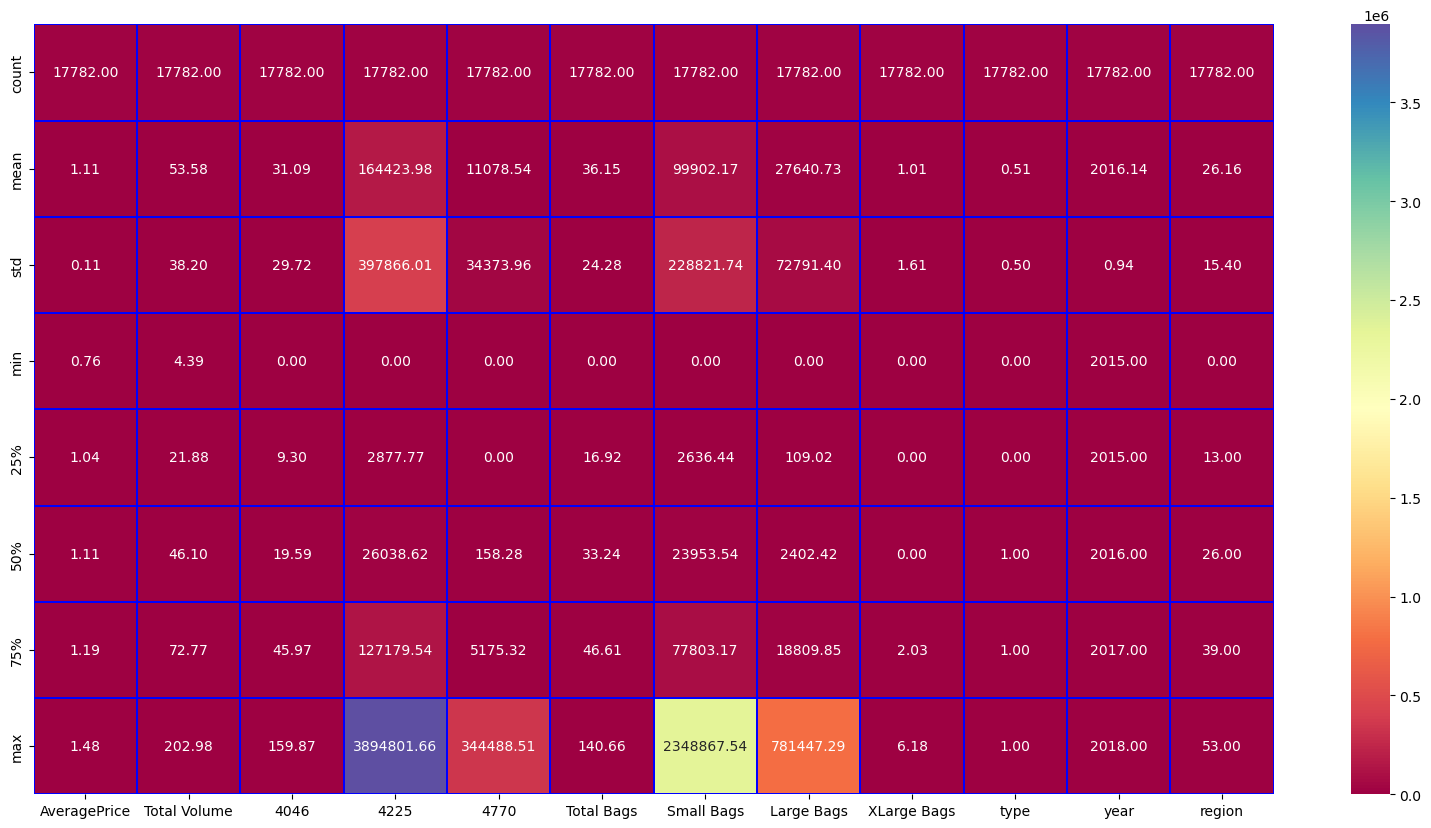

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(data.describe(),linewidth=0.3,annot=True,linecolor='blue',cmap='Spectral',fmt="0.2f")

In [44]:
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.539143,-0.555939,-0.245355,-0.249251,-0.513314,-0.282699,-0.281679,-0.364101,0.613598,0.098831,0.006047
Total Volume,-0.539143,1.000000,0.903440,0.765048,0.580427,0.953932,0.788429,0.600956,0.654886,-0.719043,0.036178,0.073620
4046,-0.555939,0.903440,1.000000,0.572037,0.507263,0.833906,0.692329,0.567291,0.594915,-0.651057,-0.010731,0.152325
4225,-0.245355,0.765048,0.572037,1.000000,0.620568,0.699553,0.779038,0.452271,0.454111,-0.384443,-0.041588,0.009466
4770,-0.249251,0.580427,0.507263,0.620568,1.000000,0.517291,0.571925,0.324308,0.484406,-0.322876,-0.082975,-0.096766
Total Bags,-0.513314,0.953932,0.833906,0.699553,0.517291,1.000000,0.825582,0.663468,0.651513,-0.661094,0.167507,0.083356
Small Bags,-0.282699,0.788429,0.692329,0.779038,0.571925,0.825582,1.000000,0.593587,0.555649,-0.369139,0.084803,0.064024
Large Bags,-0.281679,0.600956,0.567291,0.452271,0.324308,0.663468,0.593587,1.000000,0.345020,-0.288204,0.117975,0.125787
XLarge Bags,-0.364101,0.654886,0.594915,0.454111,0.484406,0.651513,0.555649,0.345020,1.000000,-0.622726,0.163262,-0.035537
type,0.613598,-0.719043,-0.651057,-0.384443,-0.322876,-0.661094,-0.369139,-0.288204,-0.622726,1.000000,0.007399,0.021970


<Axes: >

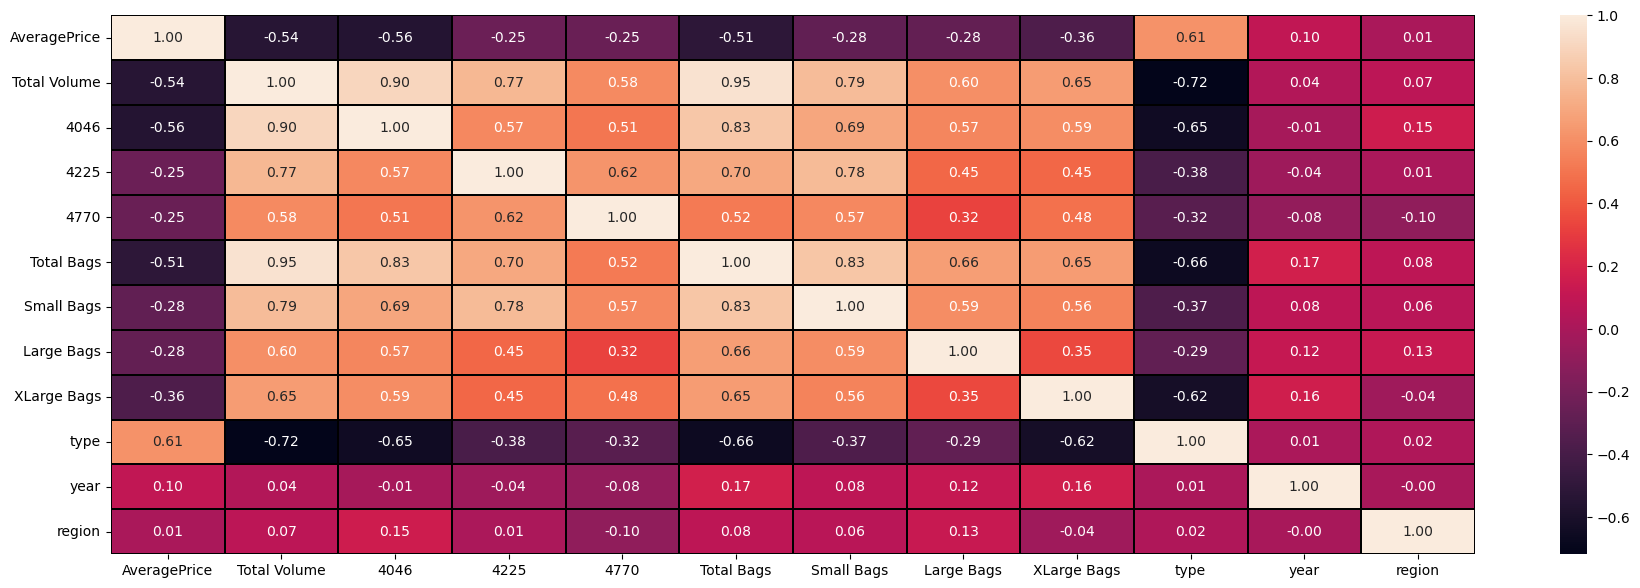

In [45]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [46]:
x = data.drop(['AveragePrice'], axis =1)
y =data['AveragePrice']

In [47]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,53.490625,Total Volume
1,9.645750,4046
2,6.103579,4225
3,1.945216,4770
4,27.151415,Total Bags
5,6.086026,Small Bags
6,2.008025,Large Bags
7,2.291052,XLarge Bags
8,3.405192,type
9,1.322875,year


In [49]:
data.drop(['Total Volume'],axis=1,inplace=True)

In [50]:
data

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.099724,10.120997,54454.85,48.16,20.564634,8603.62,93.25,0.0,0,2015,0
1,1.105209,8.768933,44638.81,58.33,21.183249,9408.07,97.49,0.0,0,2015,0
2,0.976100,9.262632,109149.67,130.50,20.120399,8042.21,103.14,0.0,0,2015,0
3,1.025986,10.421946,71976.41,72.58,17.978534,5677.40,133.76,0.0,0,2015,0
4,1.085767,9.800999,43838.39,75.78,18.355039,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,12.697058,1529.20,0.00,23.810234,13066.82,431.85,0.0,1,2018,53
18245,1.195819,10.602029,3431.50,0.00,21.002902,8940.04,324.80,0.0,1,2018,53
18246,1.232009,10.602681,2452.79,727.94,21.100134,9351.80,42.31,0.0,1,2018,53
18247,1.245047,11.517001,2981.04,727.01,22.219254,10919.54,50.00,0.0,1,2018,53


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.20,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test.shape)

Training size: (14225, 11)
Training target size: (14225,)
Test size: (3557, 11)
Test target size: (3557,)


In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "SV": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Lassocv":LassoCV(),
    "Ridgecv":RidgeCV()
}

In [53]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    model.score(x_test,y_test)
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(y_test,pred))
    print("Mean squared error",mean_squared_error(y_test,pred))
    print("r2 Score on test data",r2_score(y_test,pred)*100)  
    print("r2 Score on training data",r2_score(y_train,pred1)*100)

Linear Regression
Mean absolute Error 0.06136181291583376
Mean squared error 0.006071254058590979
r2 Score on test data 45.80955891837473
r2 Score on training data 47.15597884290121
KNN
Mean absolute Error 0.0296953537763937
Mean squared error 0.0017370741283866602
r2 Score on test data 84.49532628674095
r2 Score on training data 89.8070711555937
Ada Boost Regressor
Mean absolute Error 0.0572327917752159
Mean squared error 0.00512409031472656
r2 Score on test data 54.26369715097052
r2 Score on training data 56.63552640523037
SV
Mean absolute Error 0.05160625101563169
Mean squared error 0.0042110665913342536
r2 Score on test data 62.4131104041691
r2 Score on training data 63.574568620517155
Random Forest Regressor
Mean absolute Error 0.029398276719505123
Mean squared error 0.0016822926272249288
r2 Score on test data 84.98429177598234
r2 Score on training data 97.98145840085962
Extra Trees Regressor
Mean absolute Error 0.02561605109121782
Mean squared error 0.0013090856458201738
r2 Score

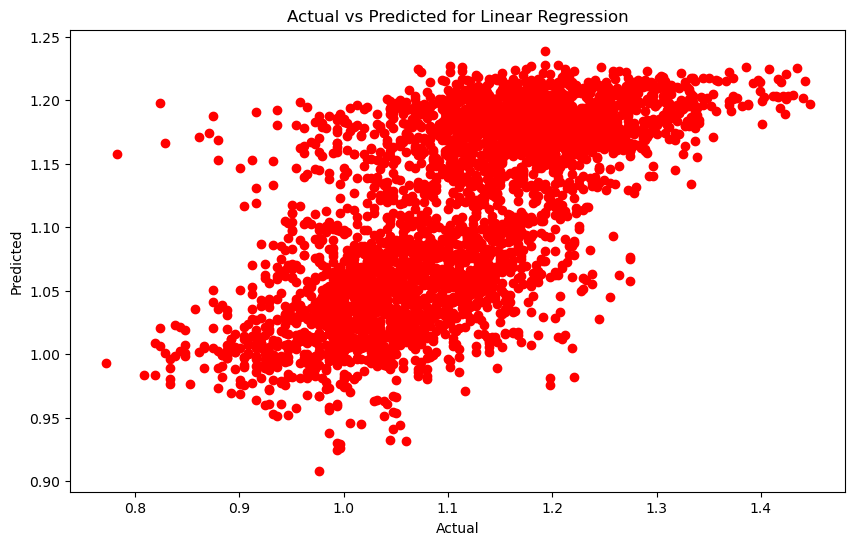

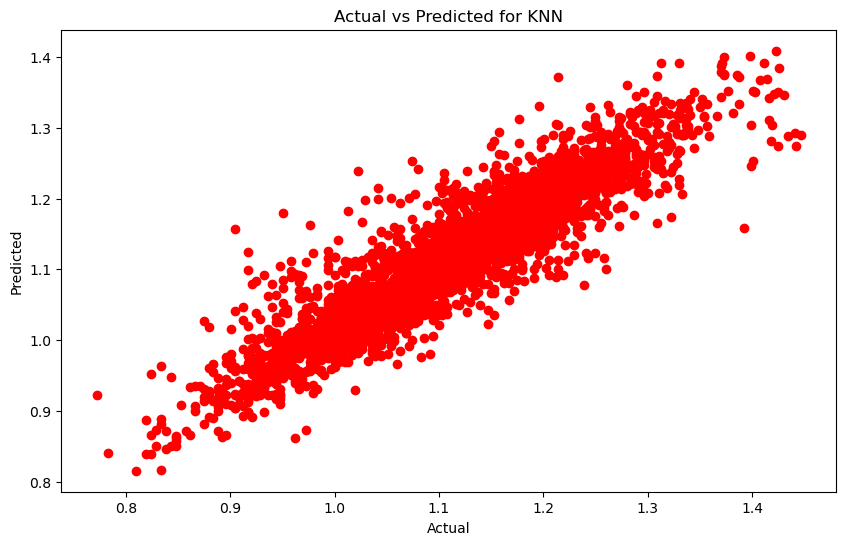

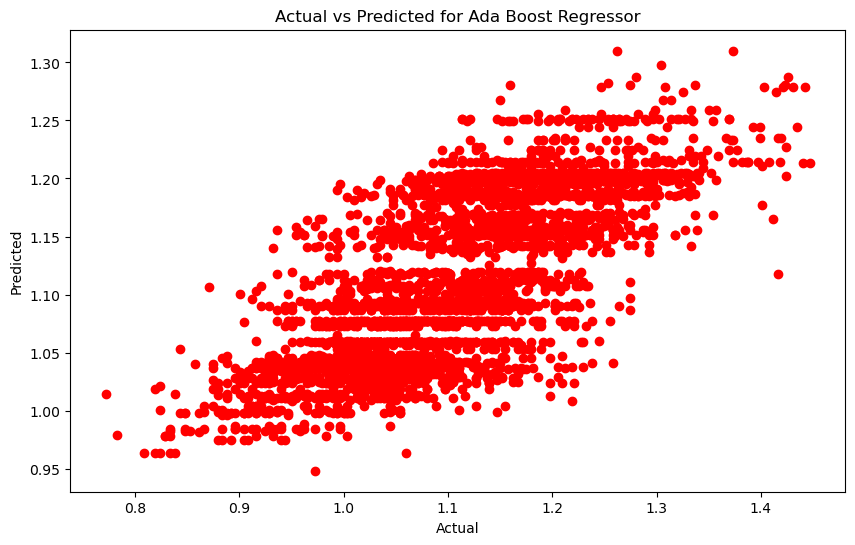

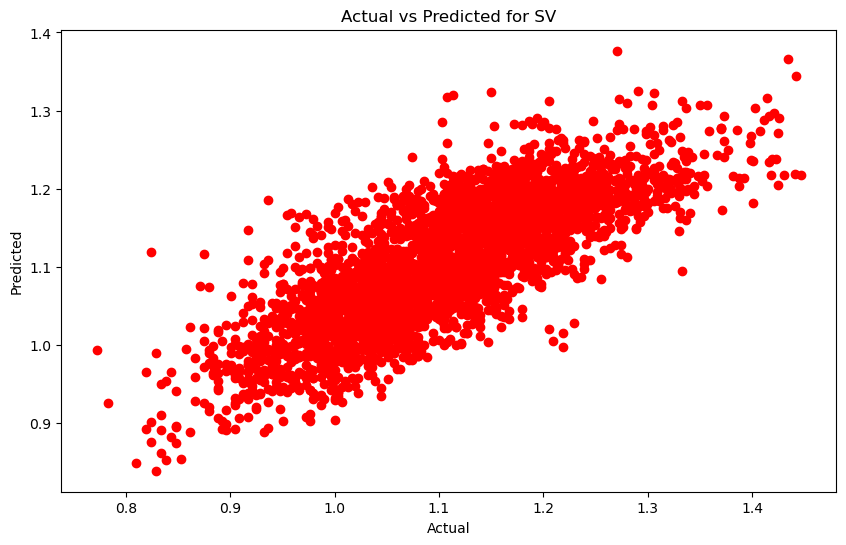

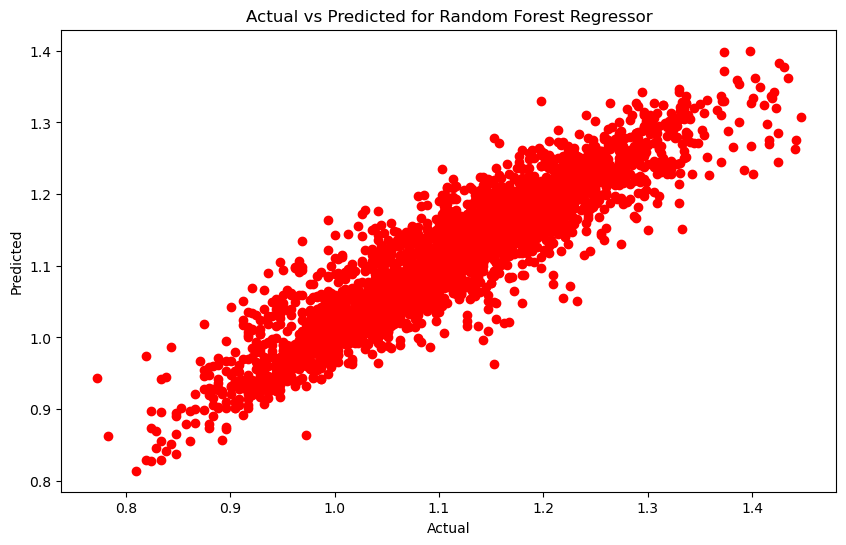

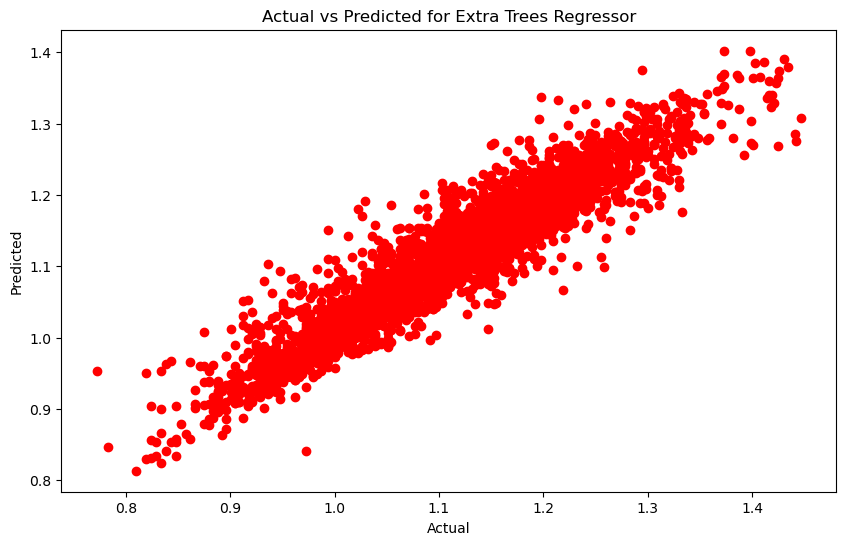

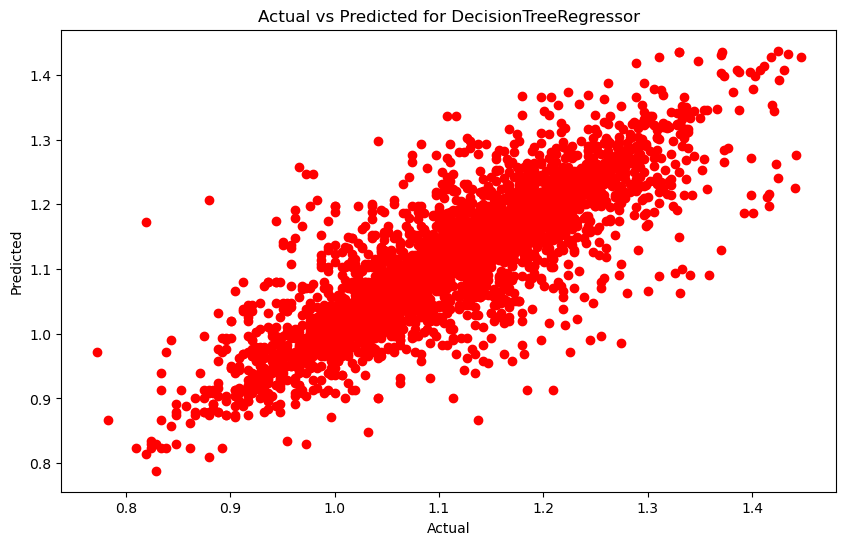

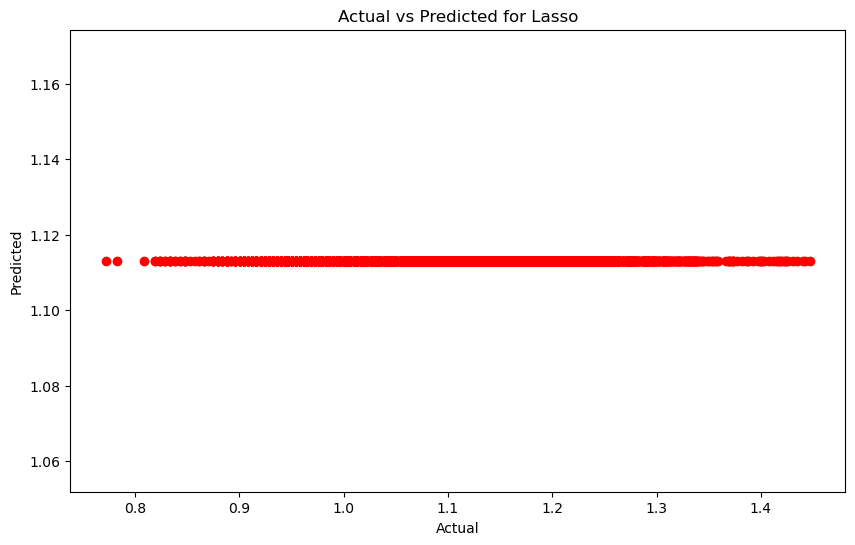

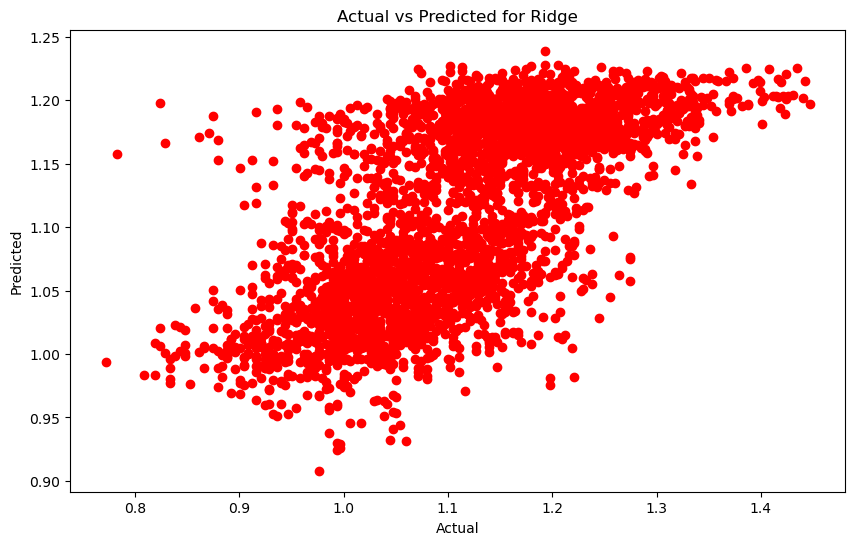

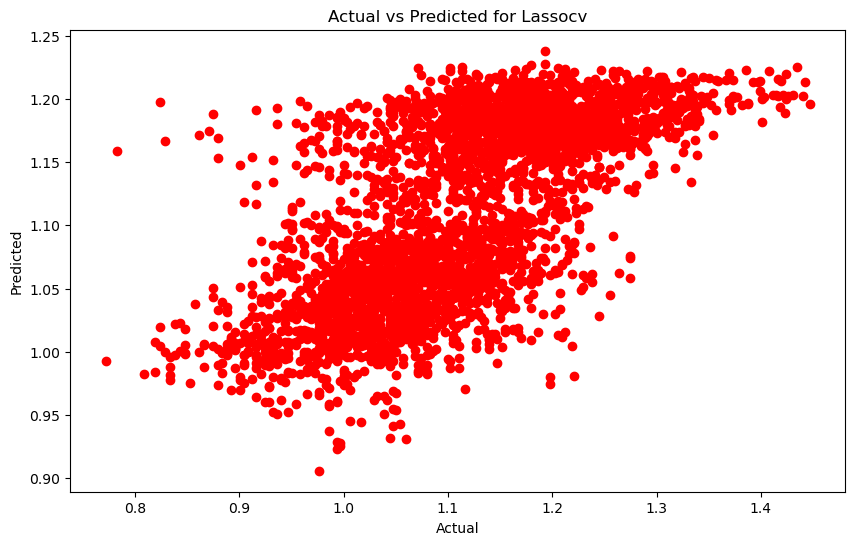

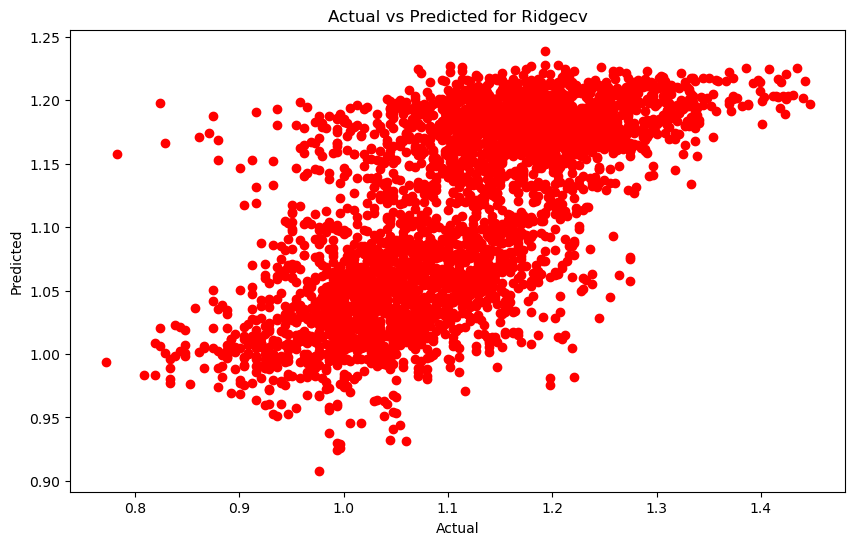

In [54]:
for model_name, model in models.items():
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, pred, color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

In [55]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Linear Regression CV mean accuracy: 0.10 ± 0.16
KNN CV mean accuracy: -0.02 ± 0.18
Ada Boost Regressor CV mean accuracy: 0.08 ± 0.29
SV CV mean accuracy: 0.13 ± 0.11
Random Forest Regressor CV mean accuracy: 0.33 ± 0.17
Extra Trees Regressor CV mean accuracy: 0.36 ± 0.14
DecisionTreeRegressor CV mean accuracy: -0.34 ± 0.44
Lasso CV mean accuracy: -0.99 ± 1.00
Ridge CV mean accuracy: 0.10 ± 0.16
Lassocv CV mean accuracy: 0.10 ± 0.16
Ridgecv CV mean accuracy: 0.10 ± 0.16


In [56]:
ET=ExtraTreesRegressor()

In [57]:
ET.fit(x_train,y_train)

ExtraTreesRegressor()

In [58]:
parameter={'bootstrap':[False],'max_depth':[None],
                    'max_leaf_nodes':[None],
                    'min_impurity_decrease':[0.0],
                    'min_samples_leaf':[1], 'min_samples_split':[2],
                    'min_weight_fraction_leaf':[0.0],
                    'n_jobs':[None], 'oob_score':[False], 'random_state':[None], 'verbose':[0],
                    'warm_start':[False]}

In [59]:
grid_GBC = GridSearchCV(ET, parameter,cv=2)
grid_GBC.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [60]:
filename="Avocado_Model.pkl"
pickle.dump(ET,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(x_test,y_test)
print(result)

0.8815291287324599


# Performing Classification models 

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
x = data.drop(['region'], axis =1)
y =data['region']

In [63]:
data.skew().sort_values(ascending=False)

4770            5.137120
Large Bags      5.072468
4225            4.472729
Small Bags      4.238647
4046            1.564617
XLarge Bags     1.317499
Total Bags      1.237136
year            0.220792
AveragePrice    0.046902
region          0.005773
type           -0.052210
dtype: float64

In [64]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [65]:
pd.DataFrame(x_new, columns= x.columns).skew().sort_values(ascending=False)

XLarge Bags     0.779301
4770            0.028015
year            0.000000
AveragePrice   -0.002355
Total Bags     -0.017397
Small Bags     -0.024657
4046           -0.027793
4225           -0.043246
type           -0.052210
Large Bags     -0.110061
dtype: float64

In [66]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.848543,AveragePrice
1,4.024256,4046
2,3.167246,4225
3,1.878644,4770
4,9.699267,Total Bags
5,5.448633,Small Bags
6,1.968123,Large Bags
7,2.301041,XLarge Bags
8,3.250257,type
9,1.299610,year


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30,random_state=39)
print('Training size:',x_train.shape)
print('Training target size:',y_train.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test.shape)

Training size: (12447, 10)
Training target size: (12447,)
Test size: (5335, 10)
Test target size: (5335,)


In [69]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

In [70]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model_name} accuracy: {accuracy_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

LogisticRegression accuracy: 0.46616682286785377
[[37  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  1 69 ...  0  0  4]
 ...
 [ 0  0  0 ... 45  3  0]
 [ 0  0  0 ...  1 55  0]
 [ 0  6  1 ...  0  0 28]]
              precision    recall  f1-score   support

           0       0.23      0.45      0.30        83
           1       0.29      0.36      0.32        83
           2       0.73      0.63      0.68       109
           3       0.36      0.40      0.38       113
           4       0.42      0.73      0.54        94
           5       0.45      0.63      0.52        90
           6       0.72      0.76      0.74        85
           7       0.61      0.27      0.37       116
           8       0.86      0.58      0.69       119
           9       0.43      0.58      0.50       100
          10       0.31      0.17      0.22        93
          11       0.42      0.72      0.53        89
          12       0.49      0.47      0.48       101
          13       0.44      0.49     

SVC accuracy: 0.516776007497657
[[59  0  0 ...  0  0  0]
 [ 1 37  0 ...  0  0  2]
 [ 1  1 57 ...  0  0  5]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  1  6 ...  0  0 45]]
              precision    recall  f1-score   support

           0       0.20      0.71      0.31        83
           1       0.40      0.45      0.42        83
           2       0.66      0.52      0.58       109
           3       0.83      0.40      0.54       113
           4       0.59      0.56      0.58        94
           5       0.40      0.43      0.42        90
           6       0.83      0.76      0.80        85
           7       0.68      0.29      0.41       116
           8       0.98      0.50      0.66       119
           9       0.42      0.48      0.45       100
          10       0.42      0.29      0.34        93
          11       0.36      0.76      0.49        89
          12       0.81      0.58      0.68       101
          13       0.74      0.47      0.58        95
 

BaggingClassifier accuracy: 0.8457357075913777
[[ 71   0   0 ...   0   0   0]
 [  0  63   0 ...   0   0   1]
 [  0   0 103 ...   0   0   0]
 ...
 [  0   0   0 ...  52   0   0]
 [  0   0   0 ...   0  60   0]
 [  0   1   1 ...   0   0  64]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.66      0.76      0.70        83
           2       0.91      0.94      0.93       109
           3       0.85      0.83      0.84       113
           4       0.83      0.95      0.89        94
           5       0.80      0.86      0.83        90
           6       0.95      0.95      0.95        85
           7       0.85      0.81      0.83       116
           8       0.95      0.97      0.96       119
           9       0.83      0.84      0.84       100
          10       0.72      0.76      0.74        93
          11       0.86      0.92      0.89        89
          12       0.87      0.90      0.88       101
    

In [71]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")

LogisticRegression CV mean accuracy: 36.24% ± 13.97%
RandomForestClassifier CV mean accuracy: 67.67% ± 11.14%
ExtraTreesClassifier CV mean accuracy: 67.39% ± 11.20%
SVC CV mean accuracy: 39.91% ± 16.57%
GradientBoostingClassifier CV mean accuracy: 59.90% ± 13.71%
AdaBoostClassifier CV mean accuracy: 5.11% ± 1.69%
BaggingClassifier CV mean accuracy: 61.05% ± 10.10%


In [72]:
RF=RandomForestClassifier()

In [73]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
parameters={'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]}

In [75]:
grid_GBC = GridSearchCV(RF, parameters,cv=2,n_jobs=-1)
grid_GBC.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [76]:
filename="Avocado_Region_Model.pkl"
pickle.dump(RF,open(filename,'wb'))
Final_Model=pickle.load(open(filename,'rb'))
result=Final_Model.score(x_test,y_test)
print(result)

0.9000937207122774
